In [95]:
import sys
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
from scipy import stats, integrate
import matplotlib.ticker as tk
import matplotlib as mpl
import os
import re

sys.path.append('/appch/data/jtb34/GitHub/GACF/')
from NGTS.NGTS_Field import return_field_from_object_directory
from NGTS.NGTS_Object import return_object_from_json_string
from NGTS.GACF_utils import TIME_CONVERSIONS

from astropy.io import fits

In [42]:
ROOT_DIR = '/appch/data/jtb34'
CYCLE = 'CYCLE1802'

In [61]:
def get_json_string(fieldname, obj_id):
    object_file_name = '{0}_VERSION_{1}'.format(obj_id, CYCLE)
    object_file = os.path.join(*[ROOT_DIR, fieldname, object_file_name, 'object.json'])
    with open(object_file, 'r') as f:
        jsonstr = f.read() 
    return jsonstr

def get_gaia_params(obj):

    XMATCH_LOCATION = '/appch/data/jtb34/{}/cross_match/'.format(obj.field)
    FILE_NAME = 'Uncut_Final_{}.fits'.format(obj.field)
    xmatch_data = fits.open(os.path.join(XMATCH_LOCATION, FILE_NAME))

    for i, obj_id in enumerate(xmatch_data[1].data['Sequence_number']):
        if int(obj.obj) == int(obj_id):
            obj.Gaia_Teff = xmatch_data[1].data['Gaia_Teff'][i]
            obj.Gaia_Radius = xmatch_data[1].data['Gaia_Radius'][i]
            obj.Gaia_Lum = xmatch_data[1].data['Gaia_Lum'][i]
            obj.TWOMASS_Hmag = xmatch_data[1].data['2MASS_Hmag'][i]
            obj.TWOMASS_Kmag = xmatch_data[1].data['2MASS_Kmag'][i]
            obj.APASS_Vmag = xmatch_data[1].data['APASS_Vmag'][i]
            obj.APASS_Bmag = xmatch_data[1].data['APASS_Bmag'][i]
            obj.Gaia_Gmag = xmatch_data[1].data['Gaia_Gmag'][i]
            obj.BminusV = obj.APASS_Bmag - obj.APASS_Vmag
            obj.HminusK = obj.TWOMASS_Hmag - obj.TWOMASS_Kmag
            obj.GminusK = obj.Gaia_Gmag - obj.TWOMASS_Kmag
    return obj
    
def create_obj(fieldname, obj_id):
    obj = return_object_from_json_string(get_json_string(fieldname, obj_id))
    return get_gaia_params(obj)

In [62]:
FIELDNAME = 'NG0004-2950'
# FIELDNAME = 'NG0535-0523'
# FIELDNAME = 'NG0504-3633'
# FIELDNAME = 'NG2346-3633'
# FIELDNAME = 'NG2058-0248'

In [67]:
obj = create_obj(FIELDNAME, 11793)
print obj

NGTS Object NG0004-2950_11793 (CYCLE1807)


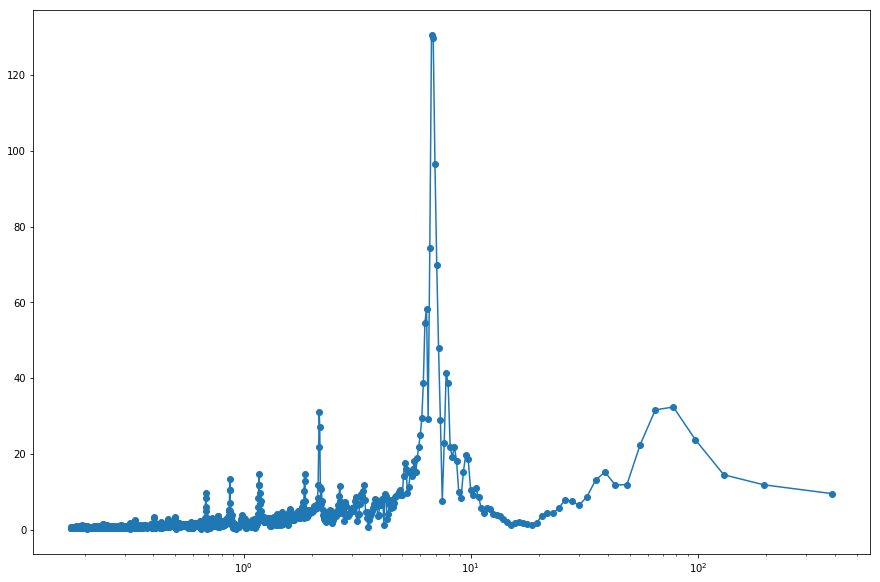

In [73]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(obj.period_axis, obj.ft, marker='o')
ax.set_xscale('log')
plt.show()

In [156]:
import numpy.fft as fft
import peakutils
def fourier_transform_and_peaks(correlations, lag_timeseries, len_ft=None, n=2, power_of_2=True):
    if len_ft is None:
        len_ft = len(lag_timeseries) * n
        
    if power_of_2:
        # add more zeros to make the length of the array a power of 2, for computational speed up
        len_ft = int(2.0 ** np.ceil(np.log2(len_ft)))
        
#     print 'number of samples', len_ft, '2 ** ', np.log2(len_ft)

    complex_ft = fft.rfft(correlations, n=len_ft)
    freqs = fft.rfftfreq(len_ft, lag_timeseries[1] - lag_timeseries[0])

    periods = 1 / freqs
    ft = np.abs(complex_ft)

    # Find peaks of FFT

    indexes = peakutils.indexes(ft, thres=0.99,  # Fraction of largest peak
                                min_dist=3  # Number of data points between
                                )

    return ft, periods, indexes


	 divide by zero encountered in divide



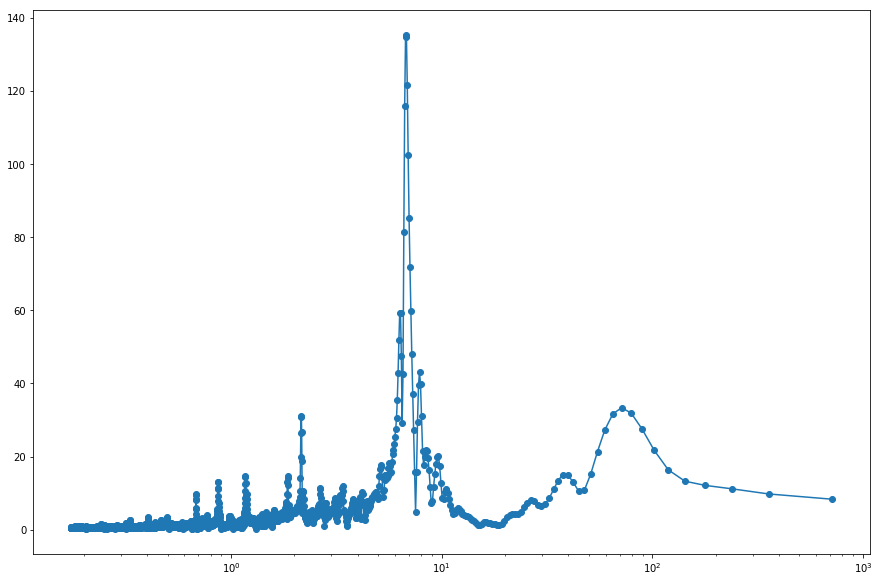

[(6.805204599372522, 135.3299712923476), (6.37987931191174, 59.29968449185373), (7.85215915312214, 43.12018942115359), (71.45464829341148, 33.35942178376791), (2.1587507037284435, 31.134033461539865), (8.406429210989586, 21.72446857653997), (9.656033553163713, 20.05806535137151), (5.626350259323739, 18.169668091700988), (5.140622179382121, 17.770102413567955), (37.6077096281113, 15.048204128770736), (5.413230931319052, 15.004505465345865), (1.171387676941172, 14.650730730645801), (1.8559648907379604, 14.593484066556007)]


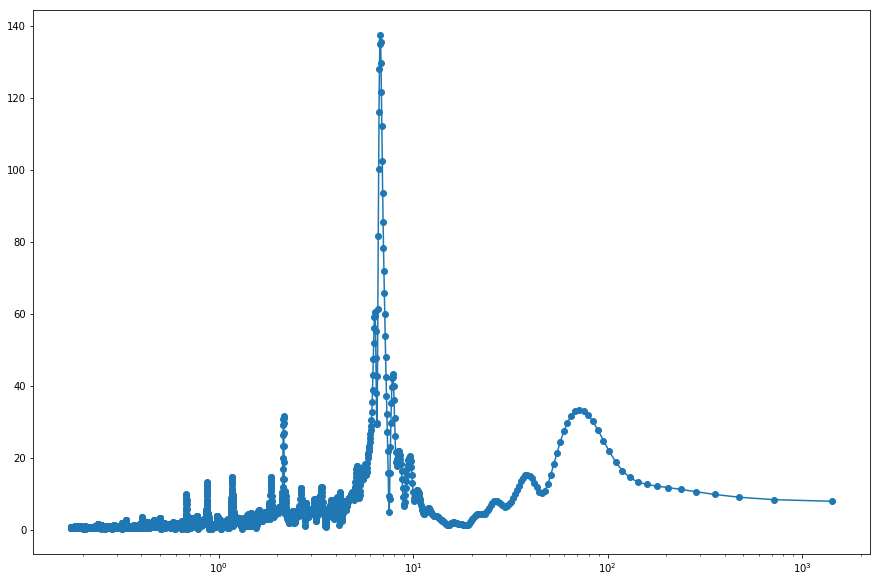

[(6.772952444873126, 137.3317694182598), (6.351524292747687, 60.500556618600775), (7.85215915312214, 43.1201894211536), (71.45464829341148, 33.35942178376789), (2.155494669484509, 31.527697995456027), (8.456171395669998, 21.893572029762975), (9.59122795884718, 20.336878063331024), (5.626350259323739, 18.169668091700995), (5.140622179382121, 17.770102413567955), (38.62413421265485, 15.257137859850001), (5.433813558434333, 15.101031751589312), (1.1704283094743895, 14.710664436943558), (1.8583783691394402, 14.652482165795073)]


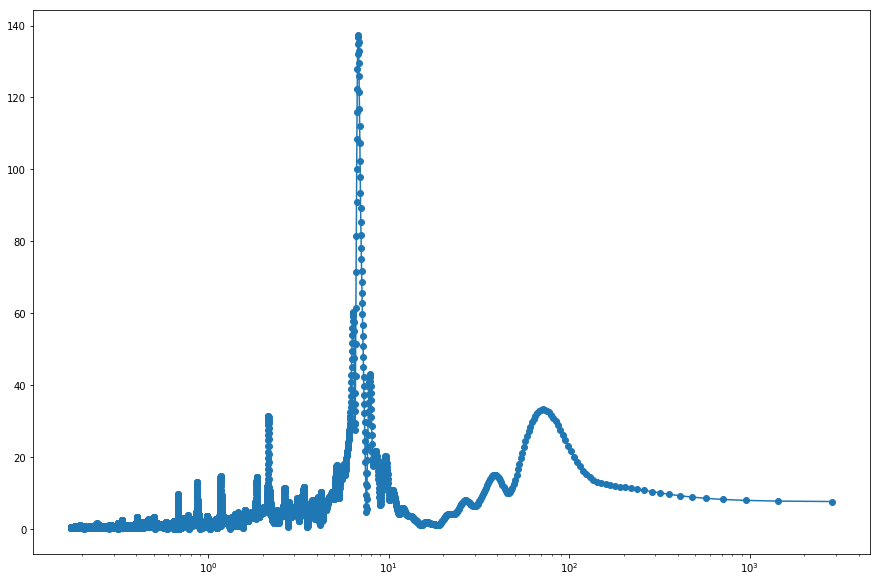

[(6.772952444873126, 137.3317694182598), (6.351524292747687, 60.50055661860077), (7.85215915312214, 43.12018942115359), (71.45464829341148, 33.35942178376791), (2.155494669484509, 31.527697995456027), (8.456171395669998, 21.893572029762993), (9.59122795884718, 20.336878063331014), (5.626350259323739, 18.169668091700988), (5.149884561687314, 17.78745679472315), (38.62413421265485, 15.257137859849996), (5.423502716767475, 15.101401426284678), (1.1709077966966241, 14.746136646238412), (1.8571708458326572, 14.684008897635891)]


In [133]:
# ft, periods, indexes = fourier_transform_and_peaks(obj.correlations, obj.lag_timeseries, n=1)
# fig, ax = plt.subplots(figsize=(15,10))
# ax.plot(periods, ft, marker='o')
# ax.set_xscale('log')
# plt.show()
# print sorted(zip(periods[indexes], ft[indexes]), key=lambda x: x[1], reverse=True)

ft, periods, indexes = fourier_transform_and_peaks(obj.correlations, obj.lag_timeseries, n=2)
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(periods, ft, marker='o')
ax.set_xscale('log')
plt.show()
print sorted(zip(periods[indexes], ft[indexes]), key=lambda x: x[1], reverse=True)

ft, periods, indexes = fourier_transform_and_peaks(obj.correlations, obj.lag_timeseries, n=4)
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(periods, ft, marker='o')
ax.set_xscale('log')
plt.show()
print sorted(zip(periods[indexes], ft[indexes]), key=lambda x: x[1], reverse=True)

ft, periods, indexes = fourier_transform_and_peaks(obj.correlations, obj.lag_timeseries, n=8)
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(periods, ft, marker='o')
ax.set_xscale('log')
plt.show()
print sorted(zip(periods[indexes], ft[indexes]), key=lambda x: x[1], reverse=True)

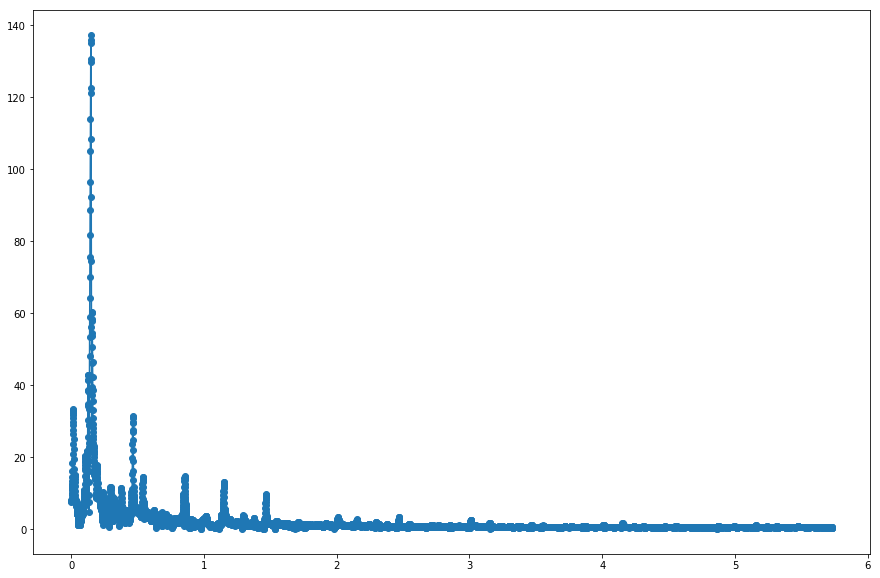

In [94]:
# ft, periods, indexes = fourier_transform_and_peaks(obj.correlations, obj.lag_timeseries, n=8)
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.divide(1.0, periods), ft, marker='o')
# ax.set_xscale('log')
plt.show()

In [89]:
periods[-2]

0.1744693492579669

In [98]:
import time

In [131]:
# test speed on FFT based on power of 2 speed up.
times_no = []
times = []
n_samples = 100
for i in range(n_samples):
    s = time.time()
    ft1, periods1, indexes1 = fourier_transform_and_peaks(obj.correlations, obj.lag_timeseries, n=4, power_of_2=False)
    e = time.time()
    times_no.append(e-s)

for i in range(n_samples):
    s = time.time()
    ft2, periods2, indexes2 = fourier_transform_and_peaks(obj.correlations, obj.lag_timeseries, n=4, power_of_2=True)
    e = time.time()
    times.append(e-s)

no_speed_up = np.nanmean(times_no)
speed_up = np.nanmean(times)
print 'Mean time without speed up:', '%.2f' % (no_speed_up * 1000.), 'ms'
print 'Mean time with speed up:', '%.2f' % (speed_up * 1000.), 'ms'
print 'Speed up {:.2f} times'.format(no_speed_up / speed_up)


	 divide by zero encountered in divide



Mean time without speed up: 19.95 ms
Mean time with speed up: 1.34 ms
Speed up 14.83 times


In [130]:
np.max(times) / np.min(times_no)

0.08816006078257566

In [119]:
np.mean([a/b for a, b in zip(times_no, times)])

4.967453292704955

In [158]:
# testing speed of increasing number of samples
ns = [1, 2, 4, 8, 16]
times = []
peaks = []
resolutions = []
for i, n in enumerate(ns):
    times.append([])
    peaks.append([])
    for j in range(n_samples):
        s = time.time()
        ft, periods, indexes = fourier_transform_and_peaks(obj.correlations, obj.lag_timeseries, n=n, power_of_2=True)
        e = time.time()
        times[i].append(e-s)
        peaks[i].append(periods[indexes[0]])
        
    resolutions.append(1.0 / periods[-1] - 1.0 / periods[-2])
print '\n'.join(['%d: runtime %.2f ms' % (n, t * 1000.) for n,t in zip(ns, [np.mean(t) for t in times])])


	 divide by zero encountered in divide



1: runtime 1.59 ms
2: runtime 1.49 ms
4: runtime 2.36 ms
8: runtime 3.98 ms
16: runtime 8.26 ms


In [159]:
print '\n'.join(['%d: resolution %.6f 1/d' % (n, t) for n,t in zip(ns, resolutions)])
print
d = 20.
print 'At {} days:'.format(d)
print '\n'.join(['%d: resolution %.6f d' % (n, find_resolution_at_period(d,t)) for n,t in zip(ns, resolutions)])

1: resolution 0.002799 1/d
2: resolution 0.001399 1/d
4: resolution 0.000700 1/d
8: resolution 0.000350 1/d
16: resolution 0.000175 1/d

At 20.0 days:
1: resolution 1.185982 d
2: resolution 0.575915 d
4: resolution 0.283871 d
8: resolution 0.140935 d
16: resolution 0.070220 d


In [147]:
def find_resolution_at_period(period, freq_res):
    fq = 1.0 / period
    fqp = fq + freq_res
    fqm = fq - freq_res
    pp = 1.0 / fqp
    pm = 1.0 / fqm
    
    return pm - period

In [161]:
print '\n'.join(['%d: peak %.6f d' % (n, t) for n,t in zip(ns, [np.mean(t) for t in peaks])])

1: peak 6.741005 d
2: peak 6.805205 d
4: peak 6.772952 d
8: peak 6.772952 d
16: peak 6.772952 d
